# Макар Кулишенко

# Домашнее задание 7: Деревья. Случайный лес

# Использую возможность сдать без штрафа дз (2 раз)

Правила:

- Домашнее задание оценивается в 10 баллов (+1 бонусный балл).


- Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.


- Можно использовать любые свободные источники с обязательным указанием ссылки на них.


- Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

<!-- ![](meme.jpg) -->
<img src="meme.jpg" alt="Drawing" style="width: 700px;"/>

## Часть 1: Основы построения решающие дерева (1.5 балла)

В этой части все расчёты необходимо реализовывать в виде запрограммированных формул, например, на `numpy`. **Нельзя использовать готовые реализации**. Например, если в задании требуется рассчитать энтропию, то требуется в каком-то виде релизовать расчёт по формуле, но нельзя использовать готовую реализацию `some_module.entropy()`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

**Задание 1.1 (0.5 балла)** Пусть известно, что в вершину решающего дерева попали 10 объектов, 8 из которых имеют метку класса $k_1$, а 2 имеют метку класса $k_2$. Рассчитайте энтропию такого распределения классов (с натуральным логарифмом). Ответ округлите до двух знаков после запятой.

In [74]:
leaf = np.array([8/10, 2/10])
entropy = round(-np.sum(leaf * np.log(leaf)), 2)
entropy

0.5

Энтропия составляет ~0.50

**Задание 1.2 (0.5 балла)** Пусть дополнительно известно, что вершина из предыдущего задания не является листовой и возможно такое разбиение, что в левое поддерево попадут все объекты класса $k_1$, а в правое - класса $k_2$. Посчитайте критерий информативности:

$$
Q(R_m, j, t) = H(R_m) - \frac{|R_\ell|}{|R_m|}H(R_\ell) - \frac{|R_r|}{|R_m|}H(R_r),
$$

где $R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения, $R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

Теперь в качестве $H(R)$ будем использовать индекс Джини:

$$
H(R) = \sum_{k=1}^J p_k(1-p_k),
$$
где $J$ – общее количество классов (в нашем случае, $J = 2$).

Ответ округлите до двух знаков после запятой.

In [75]:
def gini(y):
  size = len(y)
  probs = np.array(list(Counter(y).values())) / size
  return np.sum(probs * (1 - probs))


Рассчитаем критерий информативности.

In [76]:
R1 = [1 for i in range(8)]
R2 = [2, 2]
Q = gini(R1 + R2) - 8 / 10 * gini(R1) - 2 / 10 * gini(R2)
Q

0.32

Теперь Q = 0.32

**Задание 1.3 (0.5 балла)** Пусть при построении дерева образовалась листовая вершина с 10 объектами, значения целевой переменной для которых следующие: [1, 10, 5, 18, 100, 30, 50, 61, 84, 47] (решается задача регрессии). Чему будут равны предсказания модели для этих объектов?

Для регрессии значение в вершине будет равно среднему значению в целевой переменной в данном листе:

$$c_v = \frac{1}{|R|}\sum_{(x_i, y_i) \in R_v}y_i$$

In [5]:
leaf = np.array([1, 10, 5, 18, 100, 30, 50, 61, 84, 47])
yR = np.mean(leaf)
print(f"prediction : {yR}")

prediction : 40.6


Для всех элементов данной вершины прогноз будет равен 40.6

## Часть 2: Решающие деревья (4.5 балла)

В этой части мы напишем и протестируем собственную реализацию решающего дерева.

In [77]:
from typing import Dict, List, Tuple, Union

**Задание 2.1 (1.5 балла)** Реализуйте функцию `find_best_split()`, которая должна находить оптимальное разбиение подмножества обучающей выборки в соответствии с информационным критерием из **Задания 1.2**. В качестве меры хаотичности $H(R)$ для задачи регрессии испольуйте дисперсию подвыборки, а для задачи классификации – критерий Джини (определён в том же задании).

Для категориальных признаков применяется наивный алгоритм разбиения: мы пытаемся найти одно значение, разбиение по которому сильнее всего увеличит критерий информативности. Иными словами, объекты с конкретным значением признака отправляем в левое поддерево, остальные - в правое. Обратите внимание, что это далеко не оптимальные способ учёта категориальных признаков. Например, можно было бы на каждое значение категориального признака создавать отдельное поддерево или использовать более сложные подходы. Подробнее об этом можно прочитать в конспектах [лекций](https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture07-trees.pdf) по машинному обучению на ПМИ (раздел «Учёт категориальных признаков»).

В качестве подсказок реализации можете пользоваться кодом из бонусной части семинара по решающим деревьям.

**Бонус:** Разрешается делать цикл для перебора порогов, но возможна имплементация без него. За имплементацию без цикла – **бонус 1 балл**.

Напишем еще несколько полезных функций для того, чтобы использовать их в find_best_split.


In [78]:
def splitter(t, R, y, feature_type):
  if feature_type == 'real':
    return y[np.where(R > t)[0]], y[np.where(R <= t)[0]]
  else:
    return y[np.where(R == t)[0]], y[np.where(R != t)[0]]


def get_q_func(y1, y2, task):
  both = np.concatenate((np.array(y1), np.array(y2)))
  if task == 'classification':
    return gini(both) - y1.size/ (y1.size + y2.size) * gini(y1) - y2.size/ (y1.size + y2.size) * gini(y2)
  else:
    return both.var() - y1.size/ (y1.size + y2.size) * y1.var() - y2.size/ (y1.size + y2.size) * y2.var()


In [79]:
def find_best_split(
    feature_vector: Union[np.ndarray, pd.DataFrame],
    target_vector: Union[np.ndarray, pd.Series],
    task: str = "classification",
    feature_type: str = "real"
) -> Tuple[np.ndarray, np.ndarray, float, float]:
    """
    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини или дисперсии нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)
    :param task: либо `classification`, либо `regression`
    :param feature_type: либо `real`, либо `categorical`

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    thresholds = []
    features = np.unique(feature_vector)

    # Признаки вещественные -> сортируем по возрастанию, иначе просто оставляем
    if feature_type == 'real':
      features = np.sort(features)
      # чтобы в каждом листе был хотя бы один элемент
      thresholds = features[1:-1]
    else:
      thresholds = features

    q = np.vectorize(lambda x: get_q_func(*splitter(x, feature_vector, target_vector, feature_type), task))

    ginis = q(thresholds)
    best_index = np.argmax(ginis)
    threshold_best, gini_best = thresholds[best_index], ginis[best_index]
    return thresholds, ginis, threshold_best, gini_best


Эту функцию можно протестировать на датасете `California`.

In [9]:
from sklearn.datasets import fetch_california_housing

In [10]:
data = fetch_california_housing()
X = pd.DataFrame(data=data["data"], columns=data["feature_names"])
y = data["target"]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

Выведите график зависимости значения критерия ошибки от порогового значения при разбиении вершины по признаку `MedInc`.

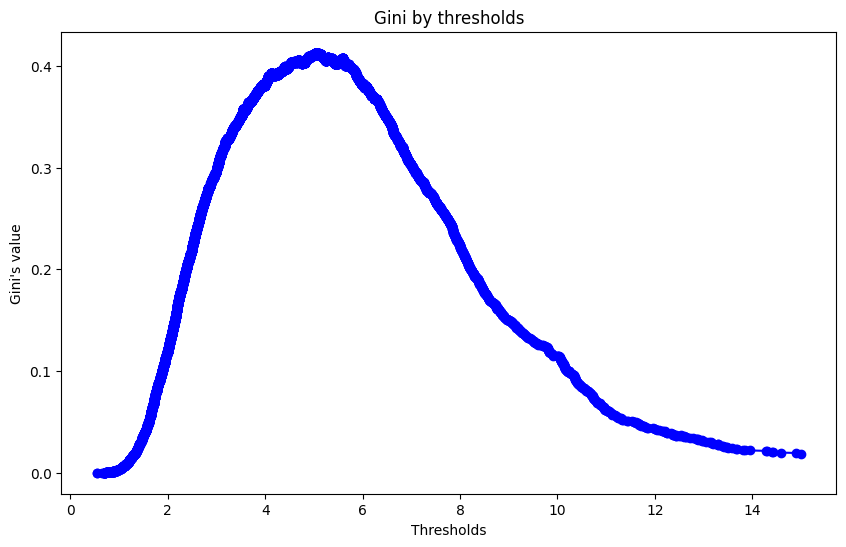

In [74]:
res = find_best_split(np.array(X['MedInc']), y, 'regression', 'real')
plt.figure(figsize=(10, 6))

plt.plot(res[0], res[1], marker='o', linestyle='-', color='b')

plt.title('Gini by thresholds')
plt.xlabel('Thresholds')
plt.ylabel('Gini\'s value')

plt.show()

Найдите лучший, с вашей точки зрения, предикат первой вершины решающего дерева.

По графику видно, что максимальное значение критерия Джини достигается при пороге = 5. Проверим это с помощью написанной выше функции.

In [75]:
print(res[2])

5.035


**Задание 2.2 (1 балл)** Разберитесь с написанным кодом решающего дерева, заполните пропуски в коде и реализуйте недостающий метод `_predict_node()`.

Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции в разделе «Построение дерева».
- **Выбор лучшего разбиения** необходимо производить по критерию Джини.
- **Критерий останова:** все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку.
- **Ответ в листе:** наиболее часто встречающийся класс в листе.

В задаче также предлагается получить два бонуса, по баллу на каждый!

- **Реализуйте способ обрабатывать пропуски в данных и реализуйте его, пояснив свои действия.**
- **Реализуйте метод оценки важности признаков.**

In [80]:
class DecisionTree:

    def __init__(
        self,
        feature_types: Union[List[str], np.ndarray],
        max_depth: int = None,
        min_samples_split: int = None,
        min_samples_leaf: int = None,
        task: str = "classification"
    ) -> None:

        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        # В этой переменной будем хранить узлы решающего дерева. Каждая вершина хранит в себе идентификатор того,
        # является ли она листовой. Листовые вершины хранят значение класса для предсказания, нелистовые - правого и
        # левого детей (поддеревья для продолжения процедуры предсказания)
        self._tree = {}

        # типы признаков (категориальные или числовые)
        self._feature_types = feature_types

        # гиперпараметры дерева
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self.task = task

        # Переменная, если вы решите делать бонус
        self._feature_importances = {}


    def _fit_node(
        self,
        sub_X: np.ndarray,
        sub_y: np.ndarray,
        node: dict
    ) -> None:

        # критерий останова
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            # подготавливаем признак для поиска оптимального порога
            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                # здесь могла быть реализация более сложного подхода к обработке категориального признака
                feature_vector = sub_X[:, feature]

            # ищем оптимальный порог
            _, _, threshold, gini = find_best_split(feature_vector, sub_y, self.task, feature_type)

            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini

                # split - маска на объекты, которые должны попасть в левое поддерево
                if feature_type == "real":
                    threshold_best = threshold
                    split = feature_vector < threshold_best
                elif feature_type == "categorical":
                    # в данной реализации это просто значение категории
                    threshold_best = threshold
                    split = feature_vector == threshold_best
                else:
                    raise ValueError

        # записываем полученные сплиты в атрибуты класса
        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["category_split"] = threshold_best
        else:
            raise ValueError

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x: np.ndarray, node: dict) -> int:
        """
        Предсказание начинается с корневой вершины дерева и рекурсивно идёт в левое или правое поддерево в зависимости от значения
        предиката на объекте. Листовая вершина возвращает предсказание.
        :param x: np.array, элемент выборки
        :param node: dict, вершина дерева
        """
        if node["type"] == "terminal":
          return node["class"]

        best = node['feature_split']
        if self._feature_types[best] == "real":
            if x[best] > node["threshold"]:
              return self._predict_node(x, node['right_child'])
            return self._predict_node(x, node['left_child'])
        elif self._feature_types[best] == "categorical":
            if x[best] == node['category_split']:
              return self._predict_node(x, node['left_child'])
            return self._predict_node(x, node['right_child'])

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self._fit_node(X, y, self._tree)

    def predict(self, X: np.ndarray) -> np.ndarray:
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))

        return np.array(predicted)

**Задание 2.3 (1 балл)** Загрузите таблицу `students.csv` (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте диаграммы рассеяния "значение признака — класс" для всех пяти признаков.

In [81]:
students = pd.read_csv('students.csv').drop('Unnamed: 0', axis=1)
students

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


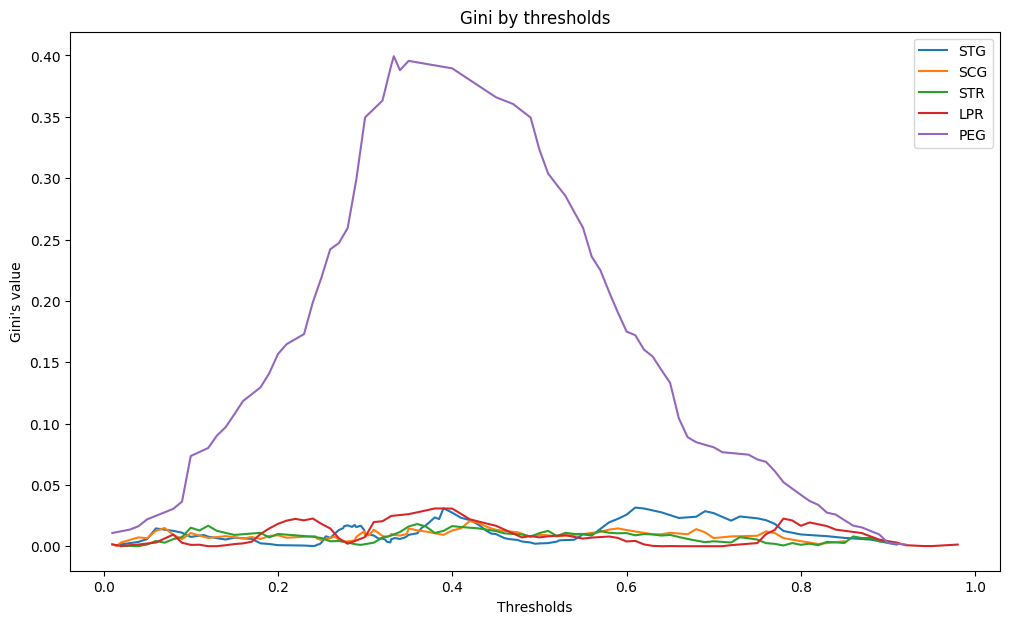

In [82]:
import seaborn as sns
cols = students.columns
plt.figure(figsize=(12, 7))

for i in range(5):
  res = find_best_split(np.array(students[cols[i]]), np.array(students['UNS']), 'classification', 'real')
  sns.lineplot(x=res[0], y=res[1], label=cols[i])

plt.title('Gini by thresholds')
plt.xlabel('Thresholds')
plt.ylabel('Gini\'s value')
plt.show()

Теперь диаграммы рассеяния:

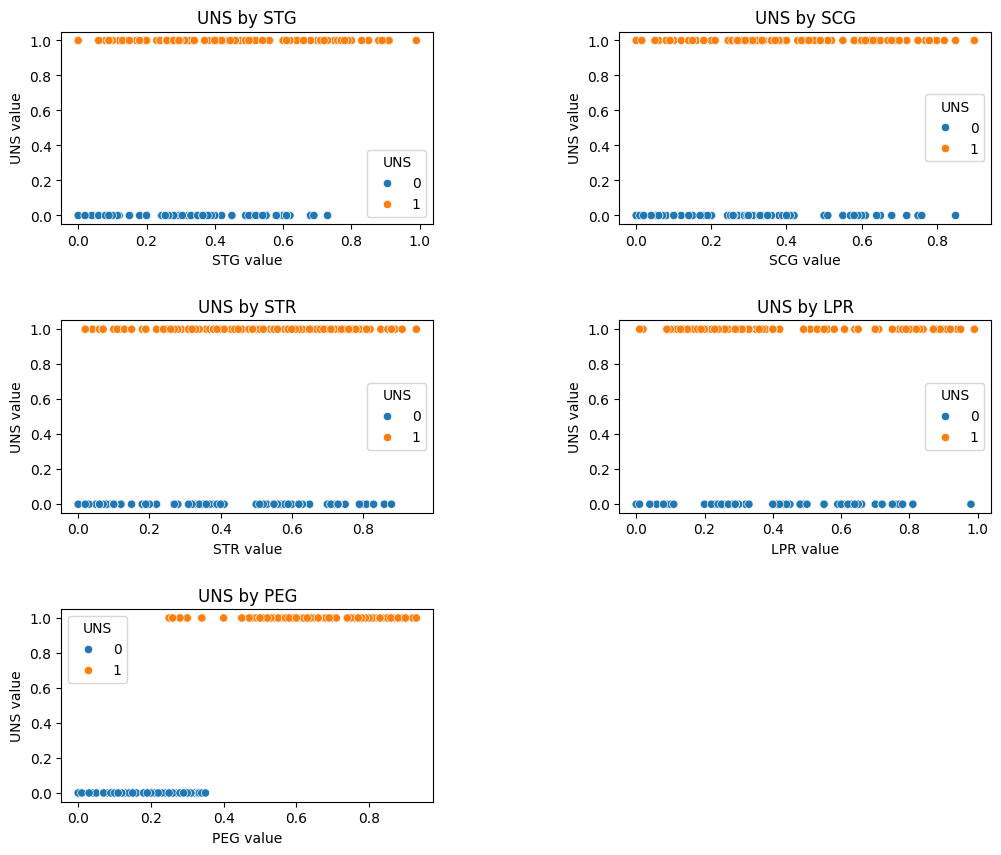

In [93]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(3, 2)
gs.update(wspace = 0.5, hspace = 0.5)
for i in range(5):
  plt.subplot(gs[i // 2, i % 2])
  sns.scatterplot(x=students[cols[i]], y=students['UNS'], hue=students['UNS'])
  plt.title(f'UNS by {cols[i]}')
  plt.xlabel(f'{cols[i]} value')
  plt.ylabel('UNS value')
plt.show()

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой диаграмм рассеяиния? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

Исходя из графика, отражающего значения критерия Джини, самый лучший вариант - разделить по признаку PEG, поскольку это единственный график, имеющий четко выраженный максимум, который значительно превышает остальные.


Если посмотреть на диаграммы рассеяния, то можно увидеть, что практически четкое разделение есть только на графике PEG (можно провести вертикальную черту при значении PEG = 0.35 и получить хорошее разбиение).

Поэтому, оба способа солидарны. Если подумать логически, то the exam performance вполне неплохо может отображать знания пользователя.

Для "хороших" признаков кривая должна иметь четко выраженный максимум, около которого значения критерия самые большие, а остальные пороги не являются настолько же хорошими. А вот кривые, по которым выборку разбить невозможно, колеблются около одного значения критерия для любого значения порога.

**Задание 2.4 (1 балл)** Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom).

1. Скачайте таблицу `agaricus-lepiota.data` (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)),
2. Считайте таблицу при помощи `pandas`,
3. Примените к каждому столбцу `LabelEncoder` (из `sklearn`), чтобы преобразовать строковые имена категорий в натуральные числа.

Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

In [145]:
!wget https://archive.ics.uci.edu/static/public/73/mushroom.zip
!unzip mushroom.zip -d mushrooms

--2024-05-25 15:29:30--  https://archive.ics.uci.edu/static/public/73/mushroom.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘mushroom.zip.2’

mushroom.zip.2          [     <=>            ] 138.01K   128KB/s    in 1.1s    

2024-05-25 15:29:32 (128 KB/s) - ‘mushroom.zip.2’ saved [141318]

Archive:  mushroom.zip
replace mushrooms/Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [172]:
mushrooms = pd.read_csv('mushrooms/agaricus-lepiota.data')
cols2 = mushrooms.columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cols2:
  mushrooms[i] = le.fit_transform(mushrooms[i])
mushrooms

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


Разобъем на тренировочную и тестовую выборки.

In [173]:
from sklearn.model_selection import train_test_split
np.random.seed(300)
y = mushrooms['p']
X = mushrooms.drop('p', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
X_train

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
7544,2,3,2,0,7,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
2368,5,0,3,1,5,1,0,0,10,1,...,2,3,3,0,2,1,4,2,5,0
2409,5,0,3,1,5,1,0,0,7,1,...,2,7,7,0,2,1,4,2,4,0
1993,5,0,4,0,5,1,1,0,3,1,...,0,7,7,0,2,1,0,2,0,1
2757,2,0,4,1,5,1,0,0,7,1,...,2,6,7,0,2,1,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,5,0,3,0,2,1,0,0,2,0,...,1,4,0,0,2,1,2,1,5,0
1494,2,0,4,0,5,1,1,0,5,1,...,2,7,7,0,2,1,0,2,3,1
1976,5,0,3,1,5,1,0,0,9,1,...,2,7,6,0,2,1,4,3,5,0
1035,5,3,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3


In [180]:
tree = DecisionTree(feature_types=['categorical'] * 22)
tree.fit(X_train.values, y_train.values)

In [181]:
from sklearn.metrics import accuracy_score
pred = tree.predict(X_test.values)
print(accuracy_score(pred, y_test.values))

1.0


## Часть 3: Бэггинг и случайный лес (4 балла)

В данной части мы будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data). Посмотрим на работу бэггинга над решающими деревьями и случайного леса, сравним их работу.

In [9]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv('diabetes.csv')
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Посмотрим на распределение целевой переменной

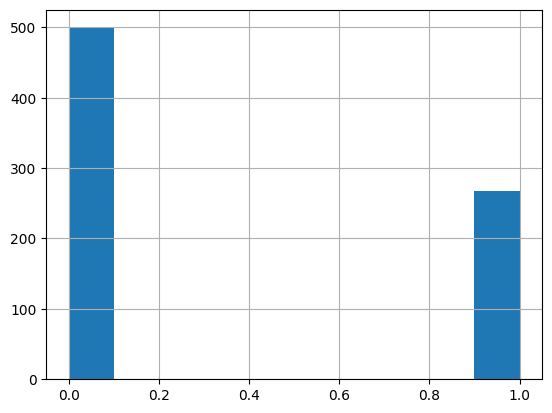

In [4]:
data['Outcome'].hist()
plt.show()

**Задание 3.1 (0.5 балла)** Разделите данные на признаки и целевую переменную. Разбейте датасет на обучающую и тестовую части в отношении 7:3. Затем разделите обучающую выборку на обучающую-обучающую и обучающую-валидационную в соотношении 7:3 (то есть в итоге должно получиться три выборки: обучающая-обучающая (0.49 от исходного датасета), обучающая-валидационная (0.21 от исходного датасета) и тестовая (0.3 от исходного датасета).

Посмотрим, есть ли пропуски.

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Пропусков нет, поэтому можем сразу разбивать выборку.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.3, stratify=data['Outcome'], random_state=228)
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=7)
X_valid

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
292,2,128,78,37,182,43.3,1.224,31
188,8,109,76,39,114,27.9,0.640,31
700,2,122,76,27,200,35.9,0.483,26
161,7,102,74,40,105,37.2,0.204,45
554,1,84,64,23,115,36.9,0.471,28
...,...,...,...,...,...,...,...,...
508,2,84,50,23,76,30.4,0.968,21
745,12,100,84,33,105,30.0,0.488,46
183,5,73,60,0,0,26.8,0.268,27
146,9,57,80,37,0,32.8,0.096,41


**Задание 3.2 (1 балл)** На обучающей-валидационной выборке подберите оптимальные значения гиперпараметров `max_depth` и `min_samples_leaf` для `DecisionTreeClassifier`. Для этого:
1. Создайте списки с возможными значениями для перебора.
2. Для каждой пары значений обучите дерево на обучающей-обучающей выборке и определите качество на обучающей-валидационной выборке. В качестве критерия будем использовать `f1-меру`.
3. Выберите ту пару значений, которая даёт наилучшее качество на обучающей-валидационной выборке.


Обучите решающее дерево с подобранными гиперпараметрами на **полной обучающей** выборке. Оцените качество классификации на тестовой выборке по метрикам `accuracy`, `precision` и `recall`, `auc_roc`.

In [30]:
from itertools import product
depth = np.arange(1, 20, 1)
min_leaf = np.arange(1, 20, 1)
maxx = 0
s = ''
for pair in product(depth, min_leaf):
  tree = DecisionTreeClassifier(max_depth=pair[0], min_samples_leaf=pair[1])
  tree.fit(X_train_part, y_train_part)
  f1 = f1_score(y_valid, tree.predict(X_valid))
  if f1 > maxx:
    maxx = f1
    s = f'depth = {pair[0]}, min samples leaf = {pair[1]}, f1 = {f1}'
print(s)

depth = 7, min samples leaf = 7, f1 = 0.7457627118644068


Видно, что оптимальные параметры: глубина = 7, минимальное число элементов в вершине - 7. Обучим на полной обучающей выборке и рассчитаем метрики.

In [31]:
tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=7)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)
print(f'accuracy: {acc}\nprecision: {prec}\nrecall: {rec}\nroc-auc: {roc_auc}')

accuracy: 0.6883116883116883
precision: 0.5616438356164384
recall: 0.5061728395061729
roc-auc: 0.6464197530864197


Видим, что в целом показатели неплохие

**Задание 3.3 (0.5 балла)** Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на 50 деревьях на **полной обучающей** выборке. Оцените качество классификации на тестовой выборке по тем же метрикам.

In [33]:
bagger = BaggingClassifier(n_estimators=50)
bagger.fit(X_train, y_train)
pred = bagger.predict(X_test)
acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)
print(f'accuracy: {acc}\nprecision: {prec}\nrecall: {rec}\nroc-auc: {roc_auc}')

accuracy: 0.7705627705627706
precision: 0.6794871794871795
recall: 0.654320987654321
roc-auc: 0.7438271604938271


Видно, что метрики заметно поднялись (процентов на 15-20%)

**Задание 3.4 (1 балл)** Выполните кросс-валидацию на полной обучающей выборке и подберите оптимальные значения гиперпараметров `max_depth` и `min_samples_split` для `Random Forest` с 50 деревьями. Для этого:

1. Создайте списки с возможными значениями для перебора.
2. Для каждой пары значений проведите кросс-валидацию на полной обучающей выборке. Количество разбиений выберите на ваш вкус. В качестве критерия будем использовать `f1-меру`. Усредните значение критерия по всем прогонам кросс-валидации.
3. Выберите ту пару значений, которая даёт наилучшее среднее качество.

Обучите случайный лес с подобранными гиперпараметрами на **полной обучающей** выборке. Оцените качество классификации по тем же метрикам. Какая из трёх построенных моделей показала себя лучше?

Кросс-валидация:

In [84]:
from sklearn.model_selection import cross_val_score
depth = np.arange(1, 20, 1)
min_split = np.arange(2, 15, 1)
maxx = 0
s = ''
for pair in product(depth, min_split):
  forest = RandomForestClassifier(n_estimators=50, max_depth=pair[0], min_samples_split=pair[1])
  scores = cross_val_score(forest, X_train, y_train, scoring = "f1", cv=5)
  f1 = scores.mean()
  if f1 > maxx:
    maxx = f1
    s = f'depth = {pair[0]}, min split = {pair[1]}, f1 = {f1}'
print(s)

depth = 12, min split = 5, f1 = 0.6513519438327623


Обучим случайный лес с подобранными гиперпараметрами:

In [85]:
forest = RandomForestClassifier(n_estimators=50, max_depth=10,  min_samples_split=5)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)
print(f'accuracy: {acc}\nprecision: {prec}\nrecall: {rec}\nroc-auc: {roc_auc}')

accuracy: 0.7748917748917749
precision: 0.6933333333333334
recall: 0.6419753086419753
roc-auc: 0.744320987654321


**Итог по трем моделям:**

Лучше всего себя показали Bagging Classifier и Random Forest. Самые высокие значения всех метрик у Random Forest (а еще он лучше всех работает на больших датасетах), а вот одиночное дерево значительно проигрывает обоим подходам.

**Задание 3.5 (0.5 балла)** Постройте график зависимости AUC ROC на тестовой выборке от числа деревьев (`n_estimators`) для случайного леса, обучаемого на **полной обучающей** выборке. Какие выводы можно сделать?

In [69]:
estimators = np.arange(1, 300, 20)
roc_auc = []
for i in estimators:
  forest = RandomForestClassifier(n_estimators=i, max_depth=13,  min_samples_split=8)
  forest.fit(X_train, y_train)
  pred = forest.predict(X_test)
  score = roc_auc_score(y_test, pred)
  roc_auc.append(score)


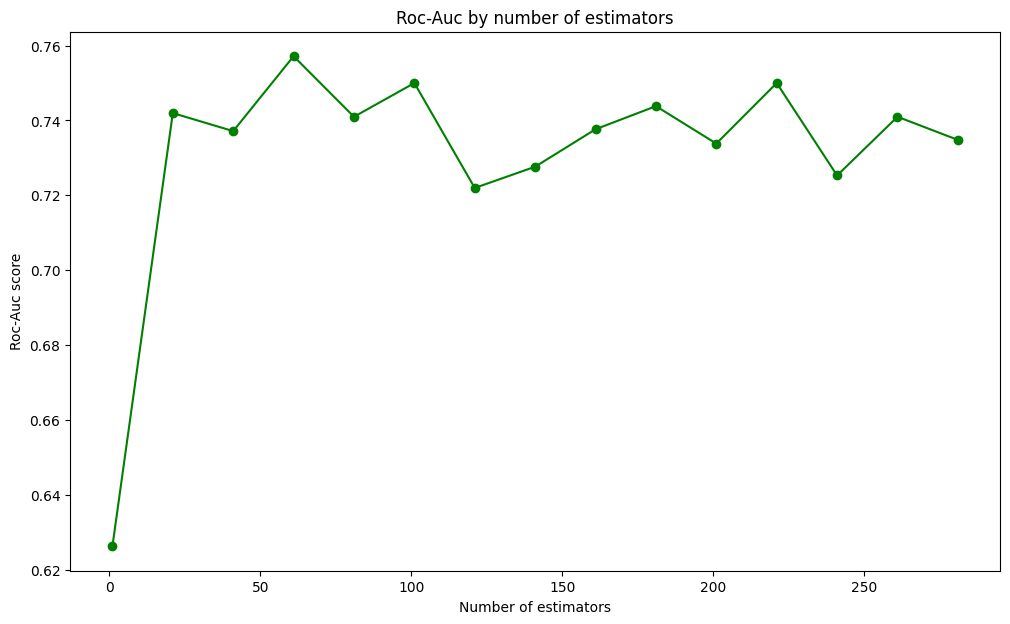

In [70]:
plt.figure(figsize=(12, 7))
plt.plot(estimators, roc_auc, marker='o', linestyle='-', color='g')
plt.title('Roc-Auc by number of estimators')
plt.xlabel('Number of estimators')
plt.ylabel('Roc-Auc score')
plt.show()

Видно, что в среднем Roc-Auc растет с увеличениям числа деревьев (до определенной поры, дальше он стабильно fluctuate around specific value), но наилучшее значение метрики достигается при определенном конечном числе (в данном случае около 65). При числе деревьев $\rightarrow \infty$ метрика выравнивается и "выходит на асимптоту".

**Задание 3.6 (0.5 балла)** Для лучшей модели случайного леса из **Задания 3.4** посчитайте важность признаков и постройте bar plot. Какой признак оказался самым важным для определения диабета?

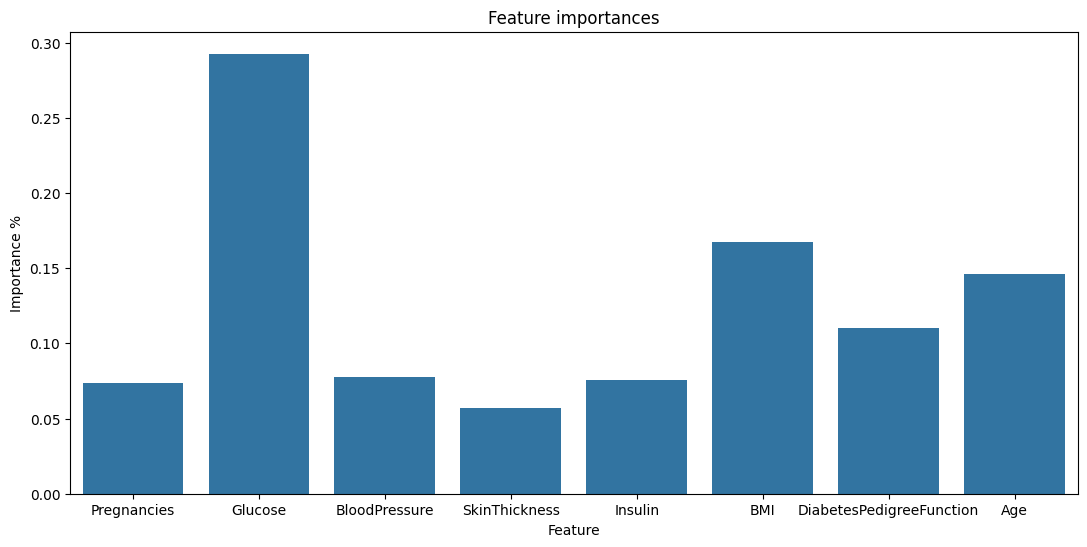

In [88]:
plt.figure(figsize=(13, 6))
sns.barplot(x=X_train.columns, y=forest.feature_importances_)
plt.title('Feature importances')
plt.xlabel('Feature')
plt.ylabel('Importance %')
plt.show()

Видно, что самый важный показатель - уровень глюкозы в крови, что неудивительно, поскольку диабетики отличаются повышенным уровнем содержания сахара в крови.